In [98]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, InputLayer
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam

In [99]:
df = pd.read_csv("/kaggle/input/wfc-dataset/WFC.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-14,45.310001,45.790001,44.840000,45.590000,39.616974,16147500
1,2019-06-17,45.580002,46.020000,45.139999,45.270000,39.338902,13420400
2,2019-06-18,45.250000,46.389999,45.060001,46.099998,40.060165,18611100
3,2019-06-19,46.480000,46.750000,45.630001,45.650002,39.669117,17787600
4,2019-06-20,45.849998,45.990002,45.240002,45.860001,39.851589,19205200
...,...,...,...,...,...,...,...
1254,2024-06-07,57.570000,58.680000,57.570000,58.360001,58.360001,14466700
1255,2024-06-10,57.900002,58.130001,57.369999,57.930000,57.930000,12793800
1256,2024-06-11,57.750000,57.750000,56.509998,57.130001,57.130001,19197800
1257,2024-06-12,58.279999,58.450001,57.160000,57.299999,57.299999,16929800


In [100]:
df = df["Close"]
df

0       45.590000
1       45.270000
2       46.099998
3       45.650002
4       45.860001
          ...    
1254    58.360001
1255    57.930000
1256    57.130001
1257    57.299999
1258    57.270000
Name: Close, Length: 1259, dtype: float64

In [101]:
scaler=MinMaxScaler(feature_range=(0,1))
scaler = scaler.fit(np.array(df).reshape(-1, 1))

In [102]:
data = scaler.transform(np.array(df).reshape(-1, 1))

In [103]:
train_ratio = 0.8

train_data = data[:int(len(data)*train_ratio)]
val_data = data[int(len(data)*train_ratio):]

In [104]:
print(train_data.shape)
print(val_data.shape)

(1007, 1)
(252, 1)


In [105]:
def createXy(data, period=100):
    params = []
    target = []
    for i in range(period, len(data)):
        params.append(data[i-period:i])
        target.append(data[i])
    return np.array(params), np.array(target)

X_train, y_train = createXy(train_data, 100)
X_val, y_val = createXy(val_data, 100)

In [106]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(907, 100, 1) (907, 1)
(152, 100, 1) (152, 1)


In [107]:
model=Sequential()
model.add(InputLayer(shape=(100, 1)))
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
# model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [108]:
model.compile(loss=MeanSquaredError(), optimizer=Adam())

In [109]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), verbose=1, epochs=50)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 140ms/step - loss: 0.0911 - val_loss: 0.0134
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - loss: 0.0068 - val_loss: 0.0052
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - loss: 0.0052 - val_loss: 0.0058
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - loss: 0.0045 - val_loss: 0.0042
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - loss: 0.0049 - val_loss: 0.0056
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - loss: 0.0039 - val_loss: 0.0031
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - loss: 0.0034 - val_loss: 0.0018
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - loss: 0.0038 - val_loss: 0.0019
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - loss: 0.0033 - val_loss: 0.0045
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - loss: 0.0028 - val_loss: 0.0044
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - loss: 0.0027 - val_loss: 0.0018
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step

In [110]:
test_df = pd.read_csv("/kaggle/input/jpm-dataset/JPM.csv")
test_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-14,143.000000,143.610001,140.699997,141.490005,137.836700,9068700
1,2023-06-15,140.589996,143.399994,140.029999,143.089996,139.395370,9343100
2,2023-06-16,143.050003,143.970001,142.500000,143.259995,139.560989,13812100
3,2023-06-20,142.610001,143.000000,141.039993,142.529999,138.849838,8428600
4,2023-06-21,142.899994,144.020004,141.690002,142.320007,138.645264,9926500
...,...,...,...,...,...,...,...
247,2024-06-07,197.429993,200.919998,197.009995,199.949997,199.949997,6964500
248,2024-06-10,199.240005,200.839996,198.440002,199.610001,199.610001,6071200
249,2024-06-11,197.910004,197.940002,193.600006,194.360001,194.360001,9235300
250,2024-06-12,196.000000,196.720001,191.309998,191.529999,191.529999,12751300


In [111]:
test_df = test_df["Close"]
test_df

0      141.490005
1      143.089996
2      143.259995
3      142.529999
4      142.320007
          ...    
247    199.949997
248    199.610001
249    194.360001
250    191.529999
251    193.660004
Name: Close, Length: 252, dtype: float64

In [119]:
test_data = scaler.transform(np.array(test_df).reshape(-1, 1))

In [124]:
init_data = test_data[0:100]
init_data = np.expand_dims(init_data, axis=0)
init_data.shape

(1, 100, 1)

In [154]:
def predict_future_stock(model, init_data, total_data, period, frame=3):
    prices = []
    for i in range(period):
        pred_price = model.predict(init_data)
        pred_price = pred_price[0][0]
        prices.append(pred_price)
        init_data = np.roll(init_data, -1, axis=1)
        init_data[0, 99, 0] = pred_price
        if i<frame:
            continue
        init_data[0, 100-frame-1, 0] = total_data[100+i-frame, 0]
        
    return prices

prices = predict_future_stock(model, X_test_mod,test_data, 150, 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━

In [155]:
prices = np.array(prices)

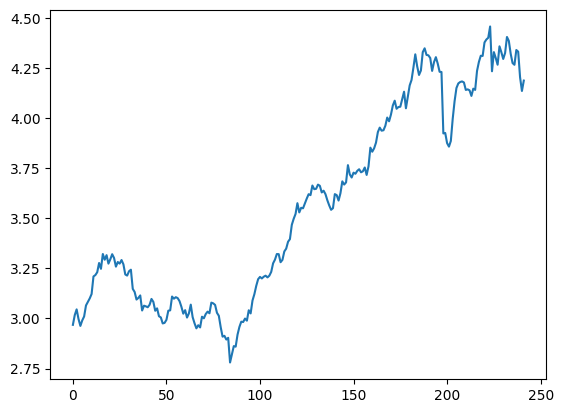

In [94]:
plt.plot(y_test)

In [95]:
pred_price = model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


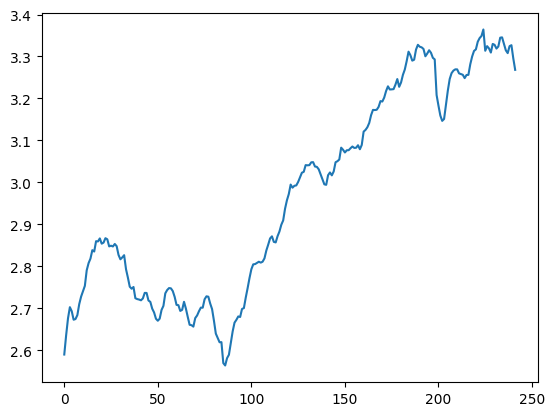

In [151]:
plt.plot(pred_price)

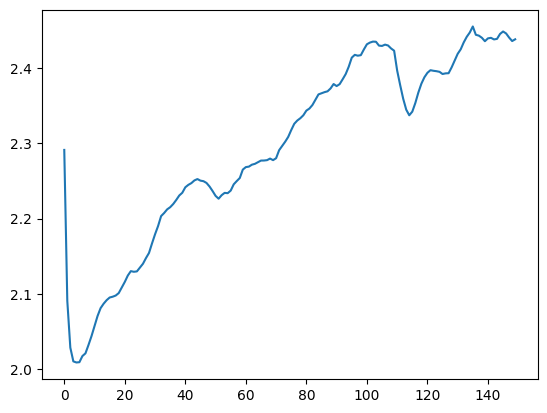

In [156]:
plt.plot(prices)

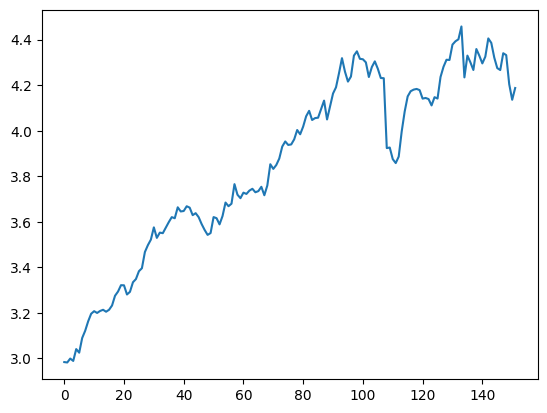

In [148]:
plt.plot(test_data[100:])

> Here we can see that if frame is 2 then it gives best result, but if frame is 3 then it is not that accurate so to get data accurately we have to use indicators also or model have to predict three days data at once